In [1]:
import os
import numpy as np
import pandas as pd

from pandas import ExcelWriter
from pandas import ExcelFile

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
import matplotlib.dates as mdates

from scipy.interpolate import interp1d
import scipy.interpolate as spi
from scipy.interpolate import splrep, splev

import statistics as s

In [2]:
file_dir = os.path.join('/Users/digisha/Downloads/Fatigue_project/data')
file_name = os.path.join(file_dir, 'Sample_Data.xlsx')
df = pd.read_excel(file_name, sheetname='Sheet1')
df.head()

/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,subject_id,question_id,answer,timestamp
0,6,1600,5,06-22-2018 22:18:46
1,6,1601,3,06-22-2018 22:18:55
2,6,1602,3,06-22-2018 22:19:02
3,6,1603,4,06-22-2018 22:19:26
4,6,1600,6,06-22-2018 23:44:43


In [3]:
#changing datatypes, time stamp in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
#only depression fatigue questionnare considererd
mask = (df['question_id'] >= 1600) & (df['question_id'] < 1700)
df_16 = df.loc[mask].reset_index(drop=True)
df_16['time'] = [t.time() for t in df_16['timestamp']]
#df_16['time'] = df_16['time'].apply(lambda x: x.strftime('%H:%M:%S'))
df_16['answer']=df_16.answer.astype('int64')
df_16.head()

,subject_id,question_id,answer,timestamp,time
0,6,1600,5,2018-06-22 22:18:46,22:18:46
1,6,1601,3,2018-06-22 22:18:55,22:18:55
2,6,1602,3,2018-06-22 22:19:02,22:19:02
3,6,1603,4,2018-06-22 22:19:26,22:19:26
4,6,1600,6,2018-06-22 23:44:43,23:44:43


In [5]:
df_16['time'] = df_16['time'].apply(lambda x: x.strftime('%H:%M:%S'))

"""mask = (df_16['subject_id'] == 6)
df_16_6 = df_16.loc[mask].reset_index(drop=True)

mask = (df_16['subject_id'] == 27)
df_16_27 = df_16.loc[mask].reset_index(drop=True)"""

"mask = (df_16['subject_id'] == 6)\ndf_16_6 = df_16.loc[mask].reset_index(drop=True)\n\nmask = (df_16['subject_id'] == 27)\ndf_16_27 = df_16.loc[mask].reset_index(drop=True)"

In [6]:
#df_16[''] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_16['weekday'] = df_16['timestamp'].dt.dayofweek.map(dayOfWeek)
df_16.head()

,subject_id,question_id,answer,timestamp,time,weekday
0,6,1600,5,2018-06-22 22:18:46,22:18:46,Friday
1,6,1601,3,2018-06-22 22:18:55,22:18:55,Friday
2,6,1602,3,2018-06-22 22:19:02,22:19:02,Friday
3,6,1603,4,2018-06-22 22:19:26,22:19:26,Friday
4,6,1600,6,2018-06-22 23:44:43,23:44:43,Friday


In [7]:
df_16['weekend'] = 0
for i in range(len(df_16)):
    if df_16['weekday'][i] == 'Saturday' or df_16['weekday'][i] == 'Sunday':
        df_16['weekend'][i] = 1
    else:
        df_16['weekend'][i] = 0
df_16.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,subject_id,question_id,answer,timestamp,time,weekday,weekend
0,6,1600,5,2018-06-22 22:18:46,22:18:46,Friday,0
1,6,1601,3,2018-06-22 22:18:55,22:18:55,Friday,0
2,6,1602,3,2018-06-22 22:19:02,22:19:02,Friday,0
3,6,1603,4,2018-06-22 22:19:26,22:19:26,Friday,0
4,6,1600,6,2018-06-22 23:44:43,23:44:43,Friday,0


In [8]:
datetime_object = datetime.strptime('00:00:00', '%H:%M:%S')
df_16['answer']=df_16.answer.astype('int64')
df_16['time'] = 0.00
for i in range(len(df_16)):
    df_16['time'][i] = (df_16['timestamp'][i] - datetime_object).seconds/(60*60)
    df_16['time'][i] = df_16['time'][i].round(2)
    
df_16.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,subject_id,question_id,answer,timestamp,time,weekday,weekend
0,6,1600,5,2018-06-22 22:18:46,22.31,Friday,0
1,6,1601,3,2018-06-22 22:18:55,22.32,Friday,0
2,6,1602,3,2018-06-22 22:19:02,22.32,Friday,0
3,6,1603,4,2018-06-22 22:19:26,22.32,Friday,0
4,6,1600,6,2018-06-22 23:44:43,23.75,Friday,0


In [9]:
mask = (df_16['weekend'] == 0)
df_day = df_16.loc[mask].reset_index(drop=True)
mask = (df_16['weekend'] == 1)
df_end = df_16.loc[mask].reset_index(drop=True)
df_end.head()

,subject_id,question_id,answer,timestamp,time,weekday,weekend
0,6,1600,0,2018-06-23 06:08:06,6.14,Saturday,1
1,6,1601,5,2018-06-23 06:08:20,6.14,Saturday,1
2,6,1602,0,2018-06-23 06:08:30,6.14,Saturday,1
3,6,1603,2,2018-06-23 06:08:42,6.14,Saturday,1
4,6,1600,0,2018-06-23 10:30:13,10.50,Saturday,1


In [10]:
mask = (df_day['question_id'] == 1600)
df_day_1600 = df_day.loc[mask].reset_index(drop=True)

mask = (df_day['question_id'] == 1601)
df_day_1601 = df_day.loc[mask].reset_index(drop=True)

mask = (df_day['question_id'] == 1602)
df_day_1602 = df_day.loc[mask].reset_index(drop=True)

mask = (df_day['question_id'] == 1603)
df_day_1603 = df_day.loc[mask].reset_index(drop=True)

mask = (df_end['question_id'] == 1600)
df_end_1600 = df_end.loc[mask].reset_index(drop=True)

mask = (df_end['question_id'] == 1601)
df_end_1601 = df_end.loc[mask].reset_index(drop=True)

mask = (df_end['question_id'] == 1602)
df_end_1602 = df_end.loc[mask].reset_index(drop=True)

mask = (df_end['question_id'] == 1603)
df_end_1603 = df_end.loc[mask].reset_index(drop=True)

df_end_1603.head(10)

,subject_id,question_id,answer,timestamp,time,weekday,weekend
0,6,1603,2,2018-06-23 06:08:42,6.14,Saturday,1
1,6,1603,1,2018-06-23 10:30:32,10.51,Saturday,1
2,6,1603,2,2018-06-23 14:55:25,14.92,Saturday,1
3,6,1603,3,2018-06-23 19:26:46,19.45,Saturday,1
4,6,1603,2,2018-06-23 23:29:45,23.50,Saturday,1
5,6,1603,3,2018-06-24 00:01:35,0.03,Sunday,1
6,6,1603,2,2018-06-24 06:56:13,6.94,Sunday,1
7,6,1603,2,2018-06-24 11:51:57,11.87,Sunday,1
8,6,1603,3,2018-06-24 16:44:21,16.74,Sunday,1
9,6,1603,3,2018-06-24 20:46:43,20.78,Sunday,1


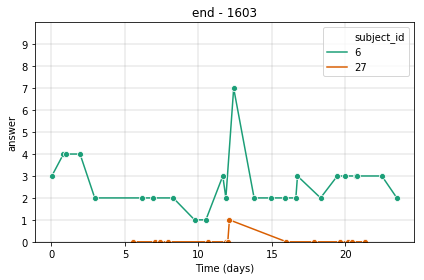

In [11]:
#plt.subplot(2, 2, 1)
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('end - 1603')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
#sns.lineplot(x = 'time', y="answer", color = 'crimson', data=df_end_1603,  marker = 'd')

sns.lineplot(x = 'time', y="answer", hue = "subject_id", data = df_end_1603, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'o')
#plt.legend(loc='upper right')
plt.xlabel('Time (days)')
plt.tight_layout()
plt.show()

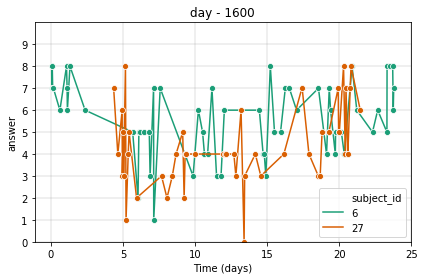

In [12]:
#plt.subplot(2, 2, 1)
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('day - 1600')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
#sns.lineplot(x = 'time', y="answer", color = 'crimson', data=df_end_1603,  marker = 'd')

sns.lineplot(x = 'time', y="answer", hue = "subject_id", data = df_day_1600, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'o')
#plt.legend(loc='upper right')
plt.xlabel('Time (days)')
plt.tight_layout()
plt.show()

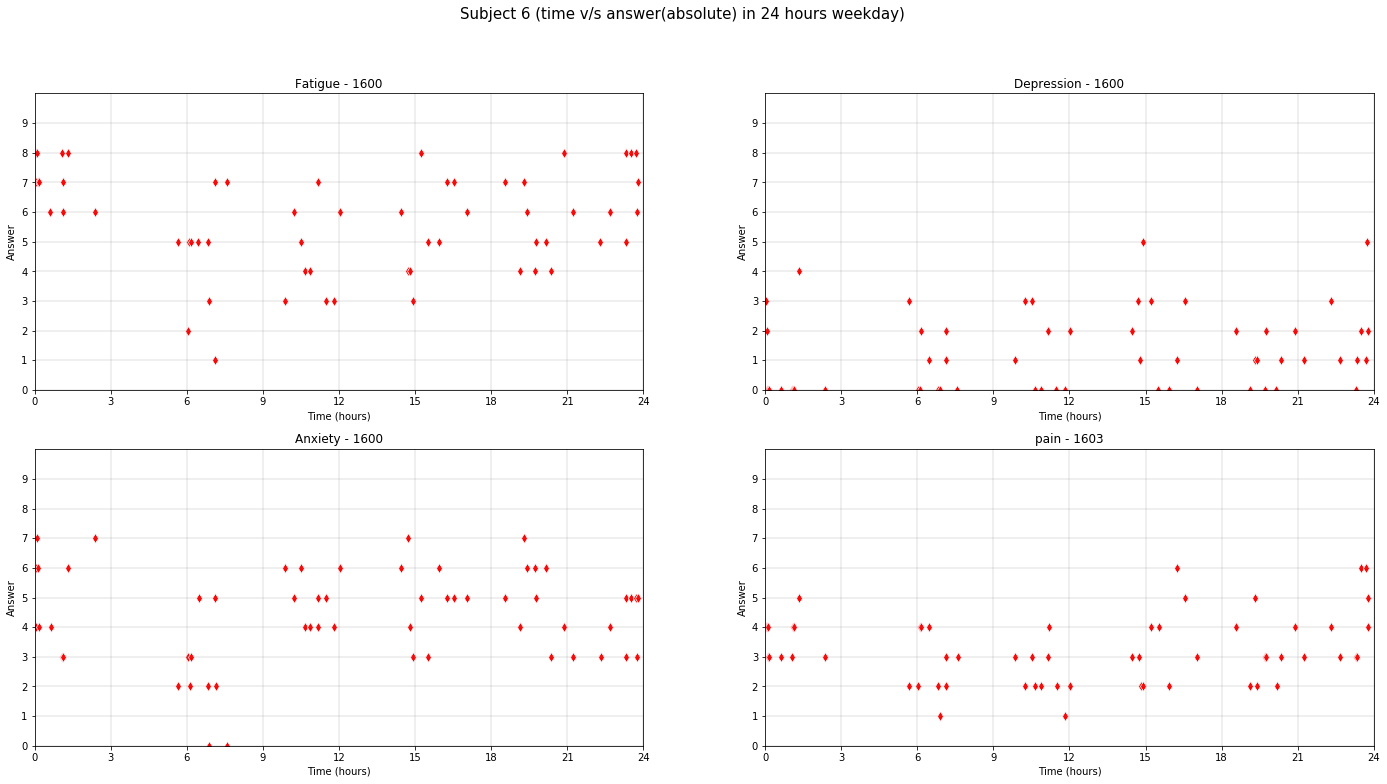

In [17]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 6 (time v/s answer(absolute) in 24 hours weekday)', fontsize=15)

plt.subplot(2, 2, 1)
ndf = df_day_1600.loc[df_day_1600['subject_id'] == 6].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Fatigue - 1600')
sns.scatterplot(x = x, y=y, color = 'red', data= ndf,  marker = 'd', s = 50)
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
#plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 2)
ndf = df_day_1601.loc[df_day_1601['subject_id'] == 6].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Depression - 1601')
sns.scatterplot(x = x, y=y, color = 'red', data= ndf,  marker = 'd', s = 50)
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
#plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 3)
ndf = df_day_1602.loc[df_day_1602['subject_id'] == 6].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Anxiety - 1602')
sns.scatterplot(x = x, y=y, color = 'red', data= ndf,  marker = 'd', s = 50)
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
#plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 4)
ndf = df_day_1603.loc[df_day_1603['subject_id'] == 6].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('pain - 1603')
sns.scatterplot(x = x, y=y, color = 'red', data= ndf,  marker = 'd', s = 50)
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
#plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.show()
#plt.legend(loc='upper right')

/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


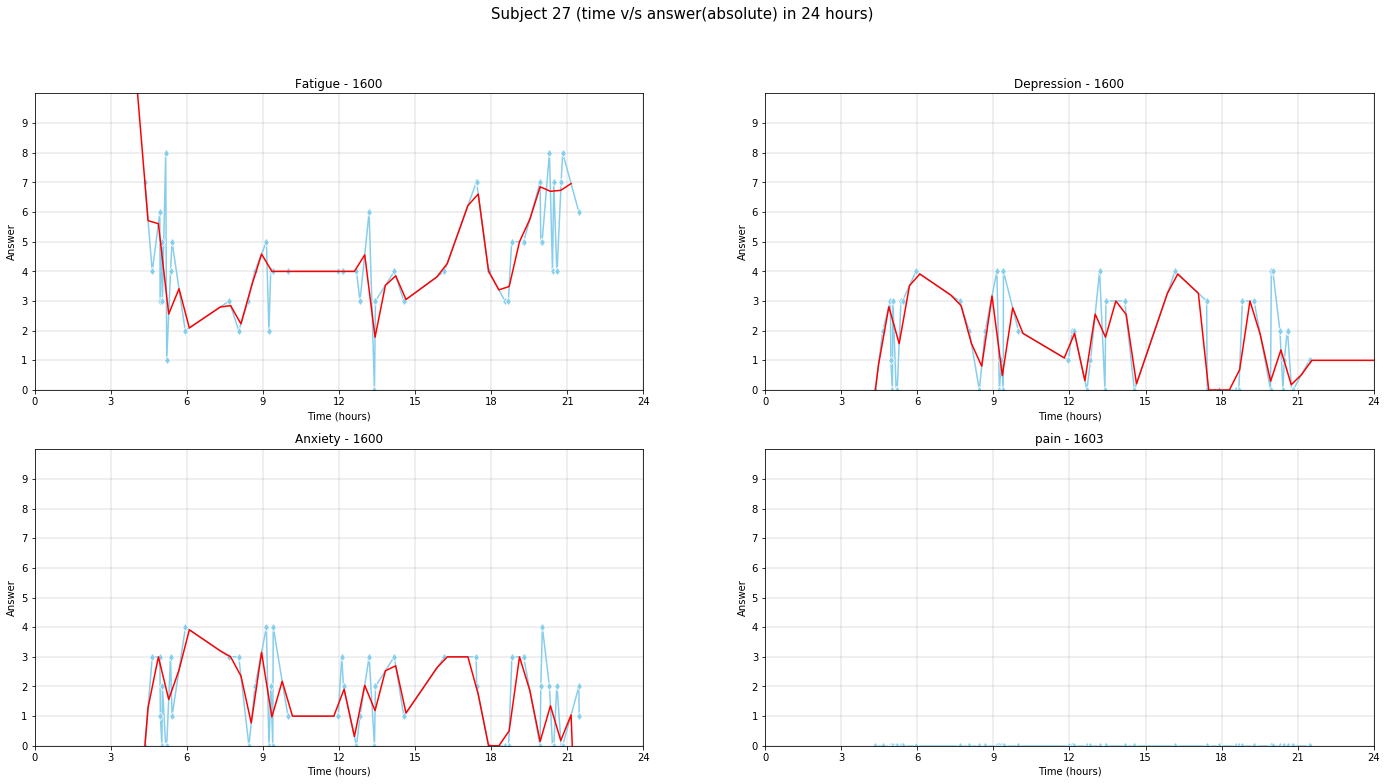

In [14]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 27 (time v/s answer(absolute) in 24 hours)', fontsize=15)

plt.subplot(2, 2, 1)
ndf = df_day_1600.loc[df_day_1600['subject_id'] == 27].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Fatigue - 1600')
sns.lineplot(x = x, y=y, color = 'red', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
#plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 2)
ndf = df_day_1601.loc[df_day_1601['subject_id'] == 27].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Depression - 1600')
sns.lineplot(x = x, y=y, color = 'red', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
#plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 3)
ndf = df_day_1602.loc[df_day_1602['subject_id'] == 27].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Anxiety - 1600')
sns.lineplot(x = x, y=y, color = 'red', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
#plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 4)
ndf = df_day_1603.loc[df_day_1603['subject_id'] == 27].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('pain - 1603')
sns.lineplot(x = x, y=y, color = 'skyblue', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
#plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.show()
#plt.legend(loc='upper right')

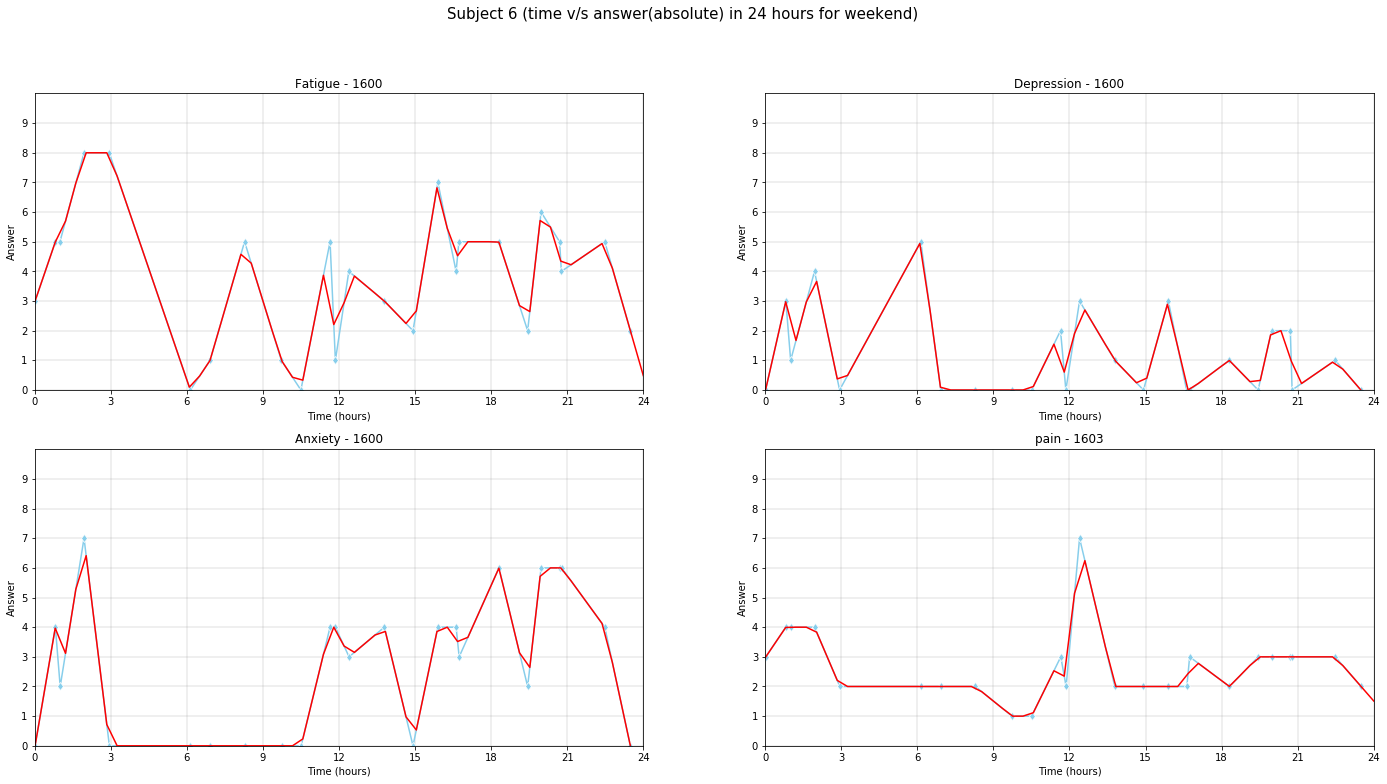

In [15]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 6 (time v/s answer(absolute) in 24 hours for weekend)', fontsize=15)

plt.subplot(2, 2, 1)
ndf = df_end_1600.loc[df_end_1600['subject_id'] == 6].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Fatigue - 1600')
sns.lineplot(x = x, y=y, color = 'skyblue', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 2)
ndf = df_end_1601.loc[df_end_1601['subject_id'] == 6].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Depression - 1600')
sns.lineplot(x = x, y=y, color = 'skyblue', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 3)
ndf = df_end_1602.loc[df_end_1602['subject_id'] == 6].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Anxiety - 1600')
sns.lineplot(x = x, y=y, color = 'skyblue', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 4)
ndf = df_end_1603.loc[df_end_1603['subject_id'] == 6].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('pain - 1603')
sns.lineplot(x = x, y=y, color = 'skyblue', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.show()
#plt.legend(loc='upper right')

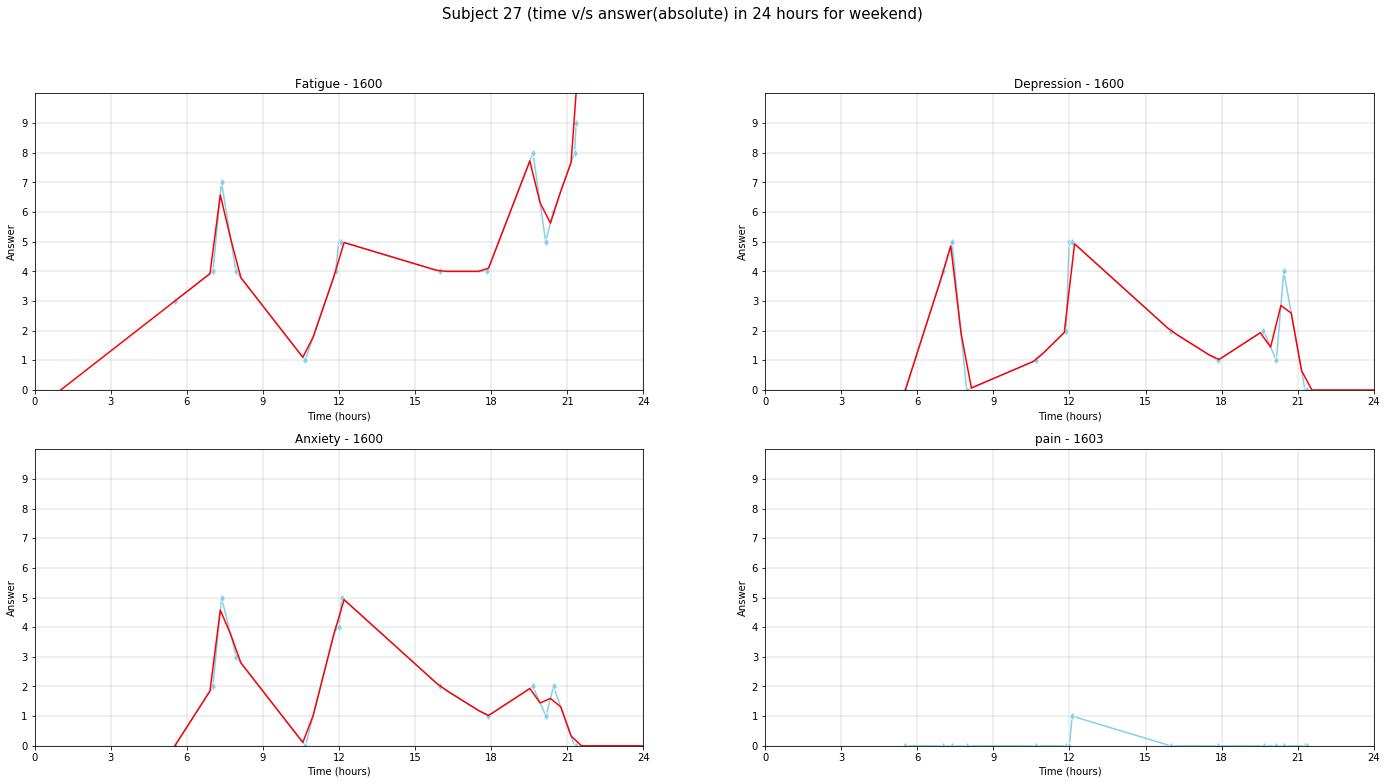

In [16]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 27 (time v/s answer(absolute) in 24 hours for weekend)', fontsize=15)

plt.subplot(2, 2, 1)
ndf = df_end_1600.loc[df_end_1600['subject_id'] == 27].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Fatigue - 1600')
sns.lineplot(x = x, y=y, color = 'skyblue', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 2)
ndf = df_end_1601.loc[df_end_1601['subject_id'] == 27].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Depression - 1600')
sns.lineplot(x = x, y=y, color = 'skyblue', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 3)
ndf = df_end_1602.loc[df_end_1602['subject_id'] == 27].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('Anxiety - 1600')
sns.lineplot(x = x, y=y, color = 'skyblue', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')

plt.subplot(2, 2, 4)
ndf = df_end_1603.loc[df_end_1603['subject_id'] == 27].reset_index(drop=True)
ndf = ndf.sort_values(by=['time']).reset_index(drop=True)
x = ndf['time'].values
y = ndf['answer'].values
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
#plt.xticks(np.arange(0, max(x), 1),rotation='45')
plt.title('pain - 1603')
sns.lineplot(x = x, y=y, color = 'skyblue', data= ndf,  marker = 'd')
k = ndf.answer.ewm(span=2, adjust=False).mean()
#plt.plot(x,k,'green')
xnew = np.linspace(0,24,60)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(xnew)
#plt.plot(xnew,y_interp,'red', label='interp/extrap')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.show()
#plt.legend(loc='upper right')

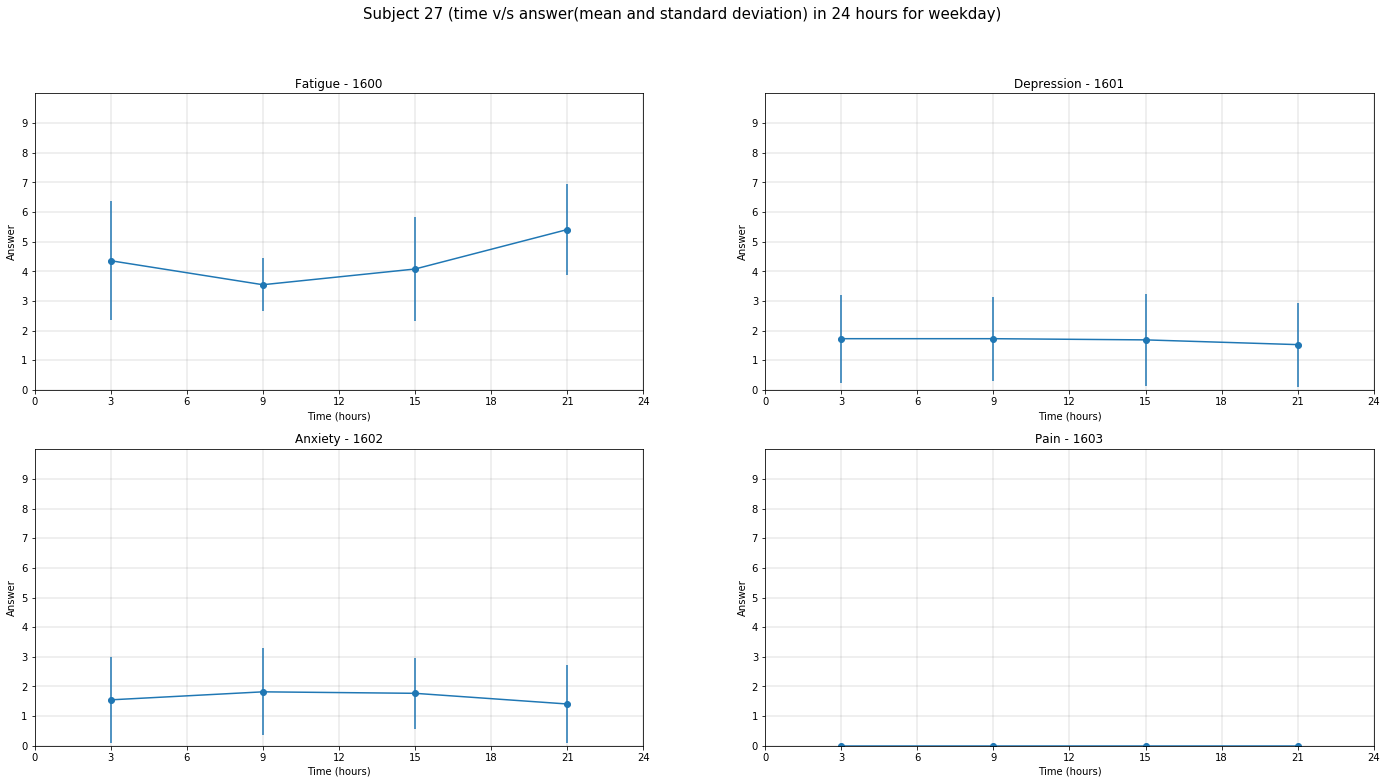

In [17]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 27 (time v/s answer(mean and standard deviation) in 24 hours for weekday)', fontsize=15)

plt.subplot(2, 2, 1)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_day_1600.loc[df_day_1600['subject_id'] == 27].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Fatigue - 1600')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.subplot(2, 2, 2)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_day_1601.loc[df_day_1601['subject_id'] == 27].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Depression - 1601')
plt.errorbar(time, mean, std, linestyle='-', marker='o')


plt.subplot(2, 2, 3)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_day_1602.loc[df_day_1602['subject_id'] == 27].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Anxiety - 1602')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.subplot(2, 2, 4)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_day_1603.loc[df_day_1603['subject_id'] == 27].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Pain - 1603')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.show()

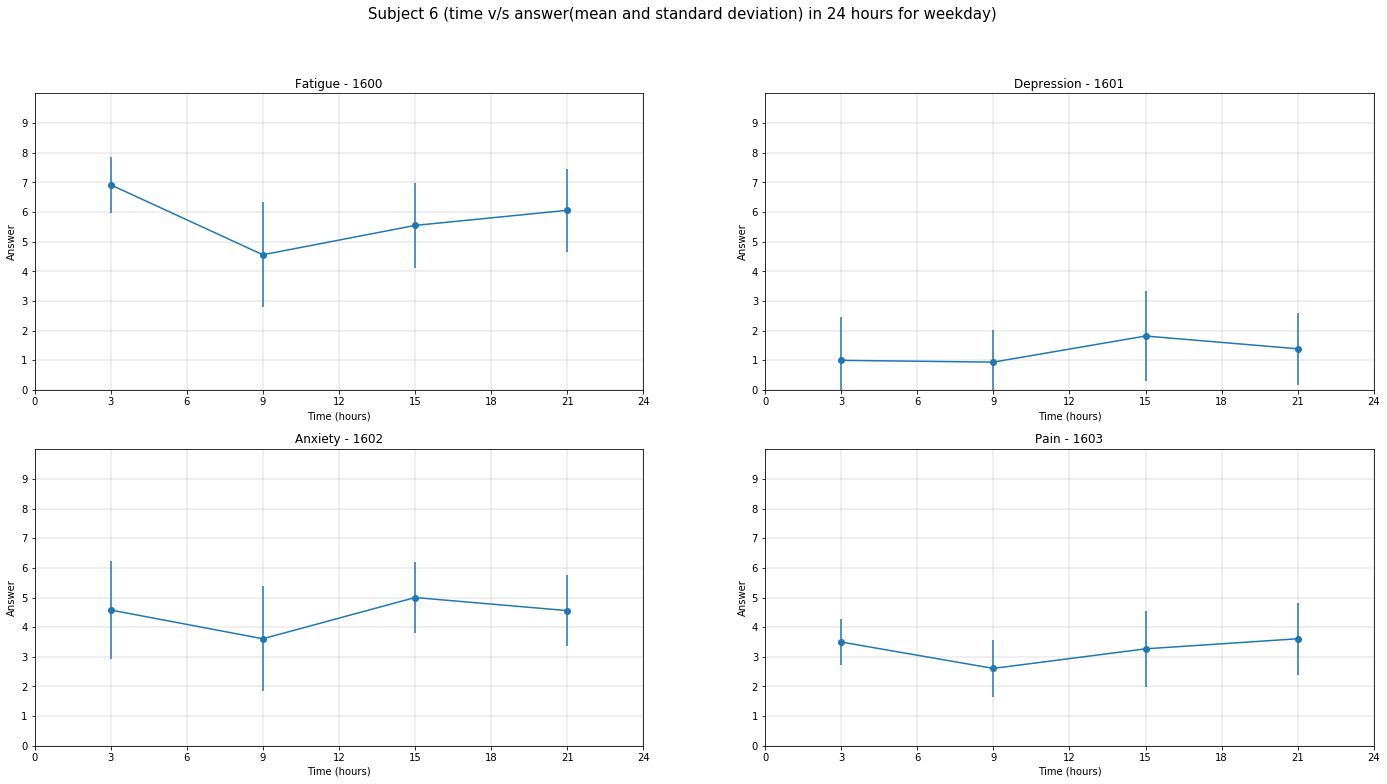

In [19]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 6 (time v/s answer(mean and standard deviation) in 24 hours for weekday)', fontsize=15)

plt.subplot(2, 2, 1)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_day_1600.loc[df_day_1600['subject_id'] == 6].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Fatigue - 1600')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.subplot(2, 2, 2)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_day_1601.loc[df_day_1601['subject_id'] == 6].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Depression - 1601')
plt.errorbar(time, mean, std, linestyle='-', marker='o')


plt.subplot(2, 2, 3)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_day_1602.loc[df_day_1602['subject_id'] == 6].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Anxiety - 1602')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.subplot(2, 2, 4)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_day_1603.loc[df_day_1603['subject_id'] == 6].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Pain - 1603')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.show()

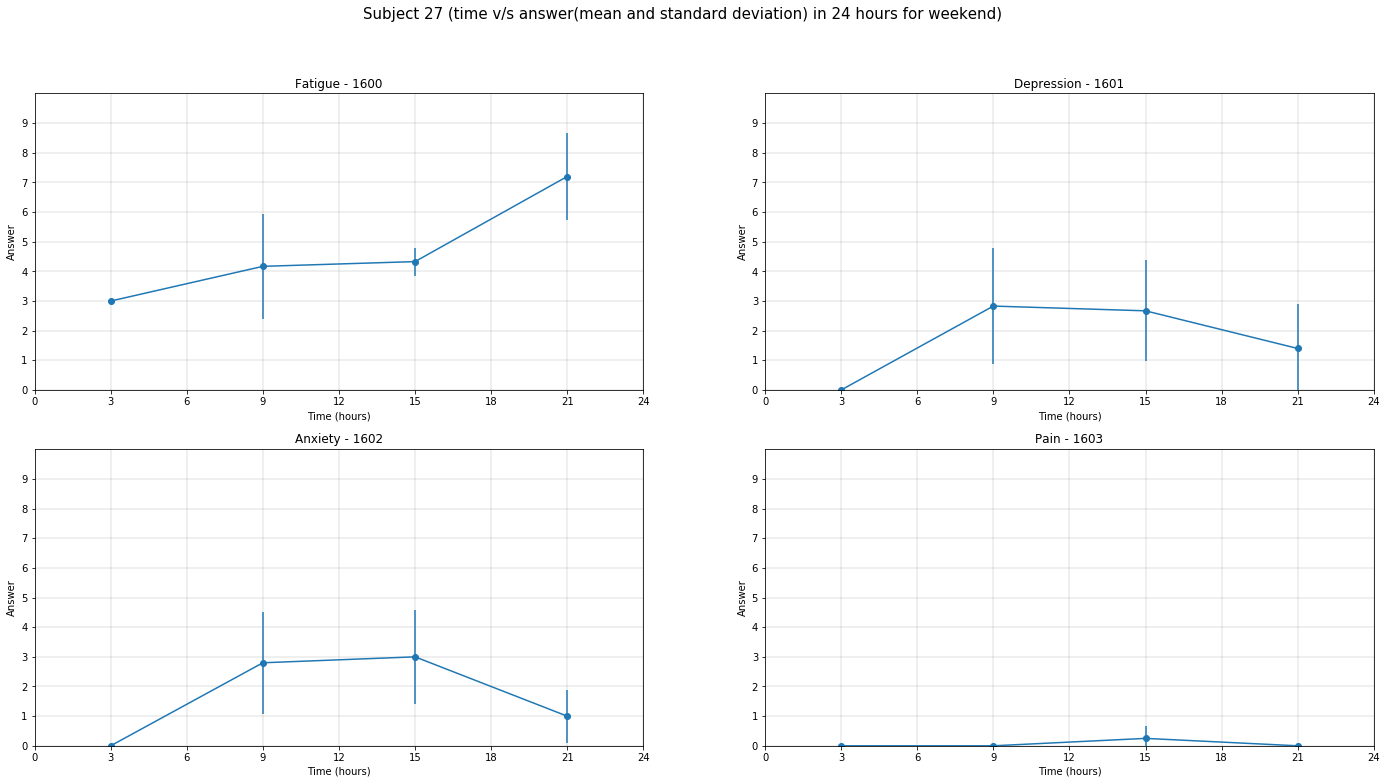

In [21]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 27 (time v/s answer(mean and standard deviation) in 24 hours for weekend)', fontsize=15)

plt.subplot(2, 2, 1)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_end_1600.loc[df_end_1600['subject_id'] == 27].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Fatigue - 1600')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.subplot(2, 2, 2)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_end_1601.loc[df_end_1601['subject_id'] == 27].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Depression - 1601')
plt.errorbar(time, mean, std, linestyle='-', marker='o')


plt.subplot(2, 2, 3)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_end_1602.loc[df_end_1602['subject_id'] == 27].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Anxiety - 1602')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.subplot(2, 2, 4)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_end_1603.loc[df_end_1603['subject_id'] == 27].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Pain - 1603')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.show()

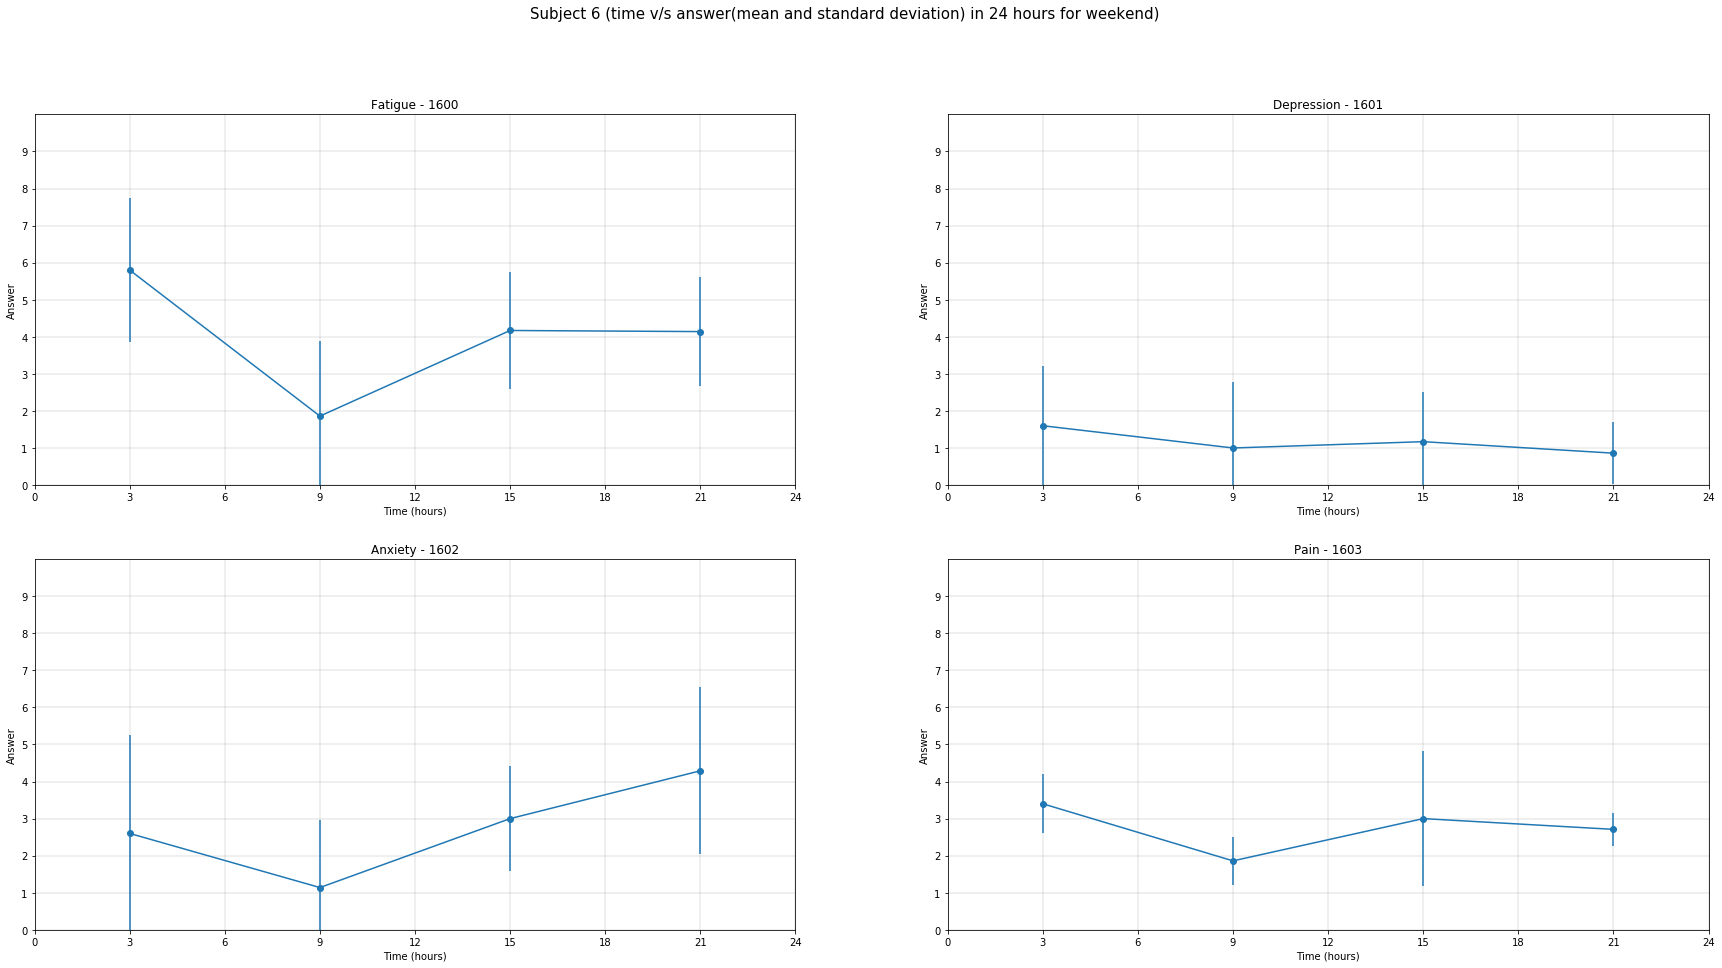

In [30]:
plt.figure(figsize = (30,15))
plt.suptitle('Subject 6 (time v/s answer(mean and standard deviation) in 24 hours for weekend)', fontsize=15)

plt.subplot(2, 2, 1)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_end_1600.loc[df_end_1600['subject_id'] == 6].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Fatigue - 1600')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.subplot(2, 2, 2)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_end_1601.loc[df_end_1601['subject_id'] == 6].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Depression - 1601')
plt.errorbar(time, mean, std, linestyle='-', marker='o')


plt.subplot(2, 2, 3)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_end_1602.loc[df_end_1602['subject_id'] == 6].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Anxiety - 1602')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.subplot(2, 2, 4)
k = 0.00
list1 = []
list2 = []
list3 = []
list4 = []

ndf = df_end_1603.loc[df_end_1603['subject_id'] == 6].reset_index(drop=True)
for i in range(len(ndf)):
    k = ndf['answer'][i]
    if ndf['time'][i] < 6.00:
        list1.append(k)
    elif ndf['time'][i] >= 6.00 and ndf['time'][i] < 12.00:
        list2.append(k)
    elif ndf['time'][i] >= 12.00 and ndf['time'][i] < 18.00:
        list3.append(k)
    elif ndf['time'][i] >= 18.00 and ndf['time'][i] < 24.00:
        list4.append(k)
    else:
        continue
#import mean 
mean = [sum(list1)/len(list1),sum(list2)/len(list2),sum(list3)/len(list3),sum(list4)/len(list4)]
mean = [ round(elem, 2) for elem in mean ]
std = [np.std(list1).round(2),np.std(list2).round(2),np.std(list3).round(2),np.std(list4).round(2)]

time = [3,9,15,21]
plt.ylim(0, 10)
plt.xlim(0, 24)
plt.xlabel('Time (hours)')
plt.ylabel('Answer')
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 27, 3))
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title('Pain - 1603')
plt.errorbar(time, mean, std, linestyle='-', marker='o')

plt.show()